In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from figure_labeler import *
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

<h1 style="text-align:center;">Navigating the Digital Frontier: A Comprehensive Investigation of the Impact of Artificial Intelligence on Multimedia Students at Mapua University</h1>
<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #motiv
- [Motivation][ref2]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [Data Preprocessing][ref4]

[ref5]: #dat_expl
- [Data Exploration][ref5]

[ref6]: #res_dis
- [Results and Discussions][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

[ref8]: #refe
- [References][ref8]

***

<a name="exec_summary"></a>
## Executive Summary

In this section, a brief summary of the notebook and the data story will be provided.
***

The notebook explores the relationship between artificial intelligence (AI) and multimedia education, with an emphasis on the opinions and experiences of Mapua University second-year multimedia students about how AI has affected their academic and career paths. It explores how AI is reshaping the landscape of multimedia education, presenting both challenges and opportunities for students and professionals alike. In order to provide insightful information for educators, experts, and students themselves, the study intends to shed light on students' awareness, understanding, and emotional responses to AI integration in their field.

[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement

This part will provide an explanation of the problem that needs to be solved.
***

The emergence of AI in the multimedia environment presents a profound junction for students, educators, and professionals. While it offers innovative solutions and possibilities, it also brings forth challenges, such as concerns about job displacement and the need for adaptation. Understanding how multimedia students perceive and navigate these challenges is crucial for guiding educational initiatives and preparing students for the evolving landscape of AI-integrated multimedia industries.

[ref]: #top
[Back to Table of Contents][ref]

<a name="motiv"></a>
## Motivation

In this section, the rationale behind solving the given problem will be explained.
***

The significance of understanding the impact of AI on multimedia students goes beyond academic inquiry. It informs educators, professionals, and students themselves, guiding curriculum development, career guidance, and emotional support strategies. By addressing this knowledge gap, the study aims to equip the relevant community with insights and tools necessary for navigating the digital frontier with confidence and creativity.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source

In this section, the source of the data and a brief overview will be provided.
***

The primary data source for this study is qualitative, gathered through surveys and interviews with 2nd-year multimedia students at Mapua University. Efforts will be made to ensure the trustworthiness of the research by mitigating biases during data collection and analysis and acknowledging potential limitations, such as individual variations in perceptions and experiences.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_prep"></a>
## Data Preprocessing

In this section, it will provide a brief overview of the data and renaming the questions to a concise form.

***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
from nltk.corpus import stopwords

In [4]:
data = pd.read_csv('survey.csv')

In [5]:
fl.table_caption("AI Survey",
                 "Table displaying the information and the survey answer.")
data.head()

,Date,Email Address,Name,Gender,Year Level,Informed Consent,To what extent do you acknowledge your awareness of AI technologies relevant to your field of study?,Do you currently utilize any AI tools in your academic projects?,How concerned are you that AI will one day replace the creative jobs currently done by multimedia professionals?,"Do you worry that AI-generated systems may lead to a loss of creativity in artistic, traditional expression within multimedia?",To what extent do you agree with the assertion that AI technologies can significantly contribute to the academic and professional development of 2nd-year multimedia students like yourself?,What are your biggest concerns or expectations regarding AI in your future studies and career as a multimedia professional?
0,29/01/2024 16:01:36,gabby72003@gmail.com,"Gutierrez, Gabrielle Faith B.",Female,2nd year,I agree.,Well-Informed,Sometimes,Moderately,Yes,Agree,My biggest concern about the impact of AI is i...
1,29/01/2024 16:03:01,mslopez@mymail.mapua.edu.ph,"Lopez, Mikka L.",Female,2nd year,I agree.,Limited,Never,Extremely,Yes,Neutral,lossing job for multimedia
2,29/01/2024 16:03:15,mjbmartillano@mymail.mapua.edu.ph,"Martillano, Marcus Jemuel B.",Male,2nd year,I agree.,Limited,Sometimes,Moderately,Maybe,Agree,I dont have any big concerns however I have so...
3,29/01/2024 16:04:21,tabladillo.regina@gmail.com,"Tabladillo, Regina Coeli",Female,2nd year,I agree.,Well-Informed,Sometimes,Slightly,Yes,Agree,Ai will become more developed and improved. It...
4,29/01/2024 16:06:59,kcsguinoo@mymail.mapua.edu.ph,"Guinoo, Kiara Chloe",Female,2nd year,I agree.,Moderately Aware,Yes,Moderately,No,Agree,Clients may resort to using AI tools when in n...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                        --------------  ----- 
 0   Date                                                                                                                                                                                          30 non-null     object
 1   Email Address                                                                                                                                                                                 30 non-null     object
 2   Name                

In [7]:
columns_to_remove = ['Email Address', 'Informed Consent','Date']
data = data.drop(columns=columns_to_remove)

In [8]:
data = data.rename(columns={
    'Year Level': 'Year_Level',
    'To what extent do you acknowledge your awareness of AI technologies relevant to your field of study?': 'AI_Awareness',
    'Do you currently utilize any AI tools in your academic projects?': 'Use_of_AI',
    'How concerned are you that AI will one day replace the creative jobs currently done by multimedia professionals?': 'AI_Job_Concern',
    'Do you worry that AI-generated systems may lead to a loss of creativity in artistic, traditional expression within multimedia?': 'AI_Creativity_Concern',
    'To what extent do you agree with the assertion that AI technologies can significantly contribute to the academic and professional development of 2nd-year multimedia students like yourself?': 'AI_Contribution',
    'What are your biggest concerns or expectations regarding AI in your future studies and career as a multimedia professional?': 'AI_Concerns_Expectations',
})

In [9]:
fl.table_caption("Modified AI Survey Questions",
                 "Modified the AI survey questions to have its title.")
data.head()

,Name,Gender,Year_Level,AI_Awareness,Use_of_AI,AI_Job_Concern,AI_Creativity_Concern,AI_Contribution,AI_Concerns_Expectations
0,"Gutierrez, Gabrielle Faith B.",Female,2nd year,Well-Informed,Sometimes,Moderately,Yes,Agree,My biggest concern about the impact of AI is i...
1,"Lopez, Mikka L.",Female,2nd year,Limited,Never,Extremely,Yes,Neutral,lossing job for multimedia
2,"Martillano, Marcus Jemuel B.",Male,2nd year,Limited,Sometimes,Moderately,Maybe,Agree,I dont have any big concerns however I have so...
3,"Tabladillo, Regina Coeli",Female,2nd year,Well-Informed,Sometimes,Slightly,Yes,Agree,Ai will become more developed and improved. It...
4,"Guinoo, Kiara Chloe",Female,2nd year,Moderately Aware,Yes,Moderately,No,Agree,Clients may resort to using AI tools when in n...


In [10]:
data.isnull().sum()

Name                        0
Gender                      0
Year_Level                  0
AI_Awareness                0
Use_of_AI                   0
AI_Job_Concern              0
AI_Creativity_Concern       0
AI_Contribution             0
AI_Concerns_Expectations    1
dtype: int64

In [11]:
data.dropna(inplace=True)
data.isnull().sum()

Name                        0
Gender                      0
Year_Level                  0
AI_Awareness                0
Use_of_AI                   0
AI_Job_Concern              0
AI_Creativity_Concern       0
AI_Contribution             0
AI_Concerns_Expectations    0
dtype: int64

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_expl"></a>
## Data Exploration

In this section, it will provide visualizations, including the WordCloud of the most words they used on open-ended question number 6. 

***

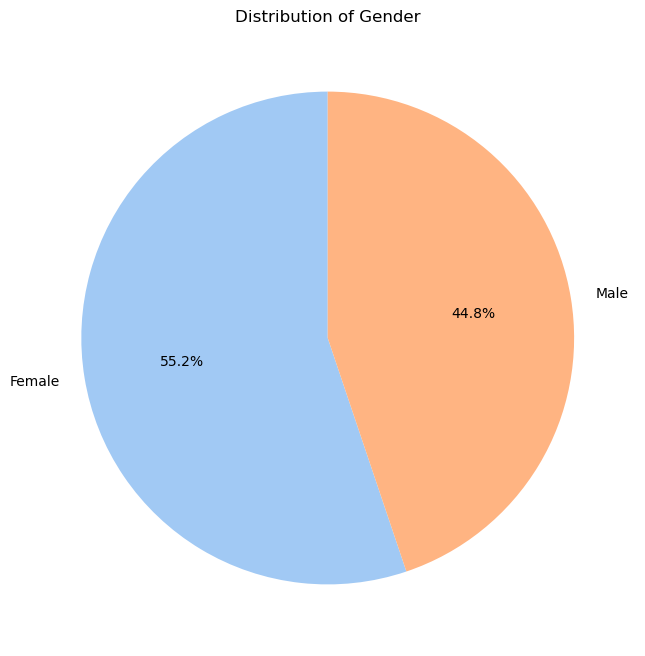

In [12]:
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, 
        labels=gender_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel')
       )
plt.title('Distribution of Gender')
plt.show()

fl.fig_caption('Gender Distribution',
               'Pie chart displaying the distribution of the gender based on the survey.')

The displayed pie chart shows the gender distribution of the gathered survey. 56.2% of the population goes to the female distribution and 44.6% of the distribution are male. This implies that there are more than half of the female participants than the male participants.

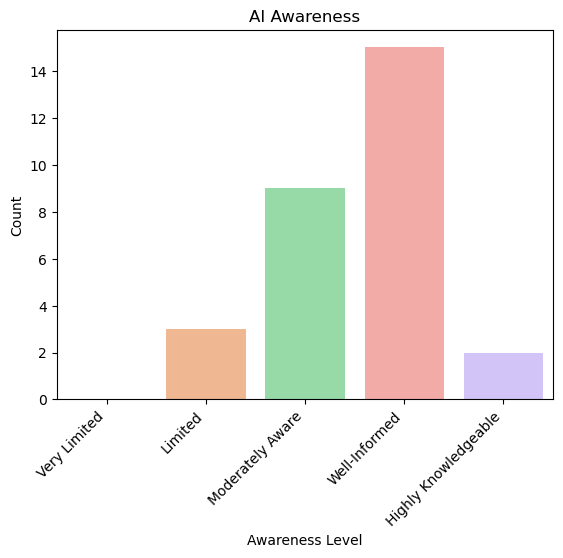

In [13]:
order = ['Very Limited', 
         'Limited', 
         'Moderately Aware', 
         'Well-Informed', 
         'Highly Knowledgeable']
sns.set_palette('pastel')
sns.countplot(x='AI_Awareness', 
              data=data, 
              order=order
             )
plt.title('AI Awareness')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Awareness Level')
plt.ylabel('Count')
plt.show()

fl.fig_caption('AI Awareness',
               'To what extent do you acknowledge your awareness of AI technologies relevant to your field of study?')

The bar graph displayed the overall distribution gained from the participants. The descriptive analysis divides the participants, depending on their AI awareness, into four categories: Well-Informed, Moderately Aware, Limited, and Highly Knowledgeable. The illustrated graph emphasizes that the most answered count is well-informed and the least answered is highly knowledgeable and very limited. This implies that most respondents have an average thorough understanding and awareness of AI technologies. 

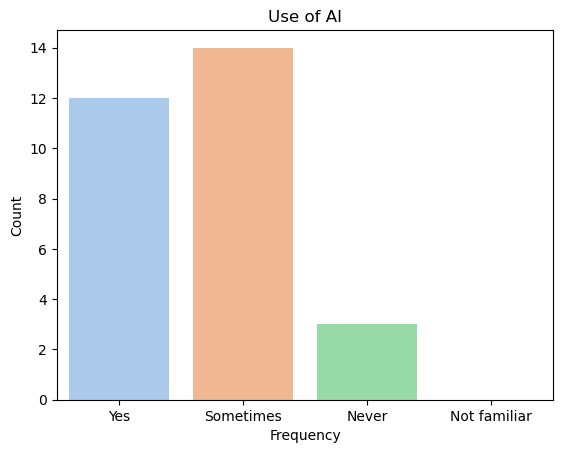

In [14]:
order = ['Yes', 
         'Sometimes', 
         'Never', 
         'Not familiar']
sns.set_palette('pastel')
sns.countplot(x='Use_of_AI', 
              data=data,
              order=order
             )
plt.title('Use of AI')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

fl.fig_caption('Use of AI',
               'Do you currently utilize any AI tools in your academic projects?')

The graph highlights the scope of interest in the utilization or use of AI. This count focuses on seeking the levels of the participant’s relationship towards applying the productivity of AI technology to their academic projects.The highest count corresponds to sometimes following yes and the lowest count is never. This suggests that almost all of the participants have utilized and engage in AI tools in their academic projects. 

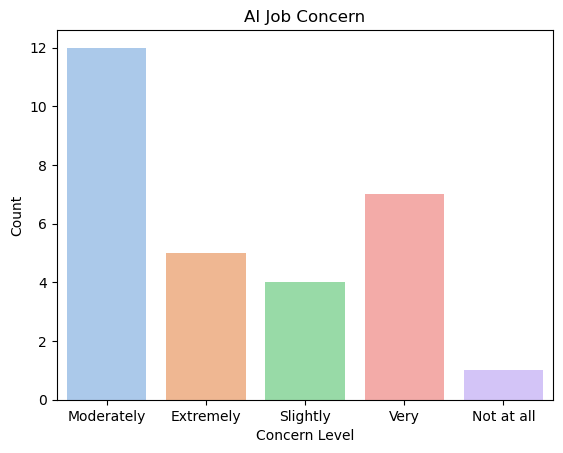

In [15]:
sns.set_palette('pastel')
sns.countplot(x='AI_Job_Concern', 
              data=data
             )
plt.title('AI Job Concern')
plt.xlabel('Concern Level')
plt.ylabel('Count')
plt.show()

fl.fig_caption('AI Job Concern',
               'How concerned are you that AI will one day replace the creative jobs currently done by multimedia professionals?')

The graph highlights the scope of interest concerning potential job replacement considering AI advancements. In this frequency analysis, the participants’ fear ranges and worriedness are emphasized by depicting five categories. The highest count is evidently the participants who answered moderately followed by very. This implication means that the participant’s fear ranges averagely. However, there is a slight appearance of not at all that indicates the participants level of fear of being replaced is minimal.  

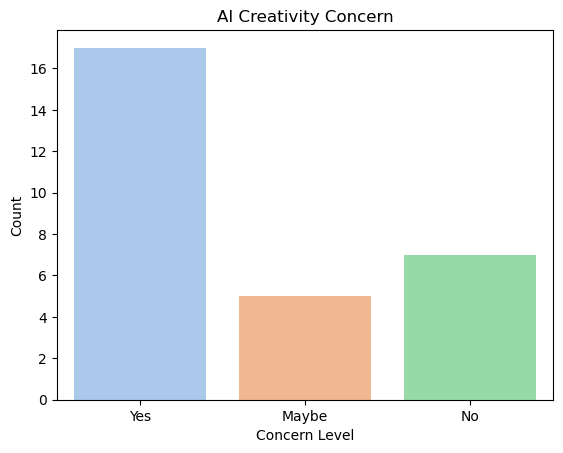

In [16]:
sns.set_palette('pastel')
sns.countplot(x='AI_Creativity_Concern', 
              data=data
             )
plt.title('AI Creativity Concern')
plt.xlabel('Concern Level')
plt.ylabel('Count')
plt.show()

fl.fig_caption('AI Creativity Concern',
               'Do you worry that AI-generated systems may lead to a loss of creativity in artistic, traditional expression within multimedia?')

The scope of interest highlights AI creativity concern that identifies an analysis for insight regarding the respondents' ability to be worried. The majority indicates a significant count expressing that they worry about the possible loss of creativity in applying AI tools. While there is a low count in the stance of not being sure if they seem to worry or not. This count analysis reveals the pattern of respondents' concerns about the consequences of AI on creativity.

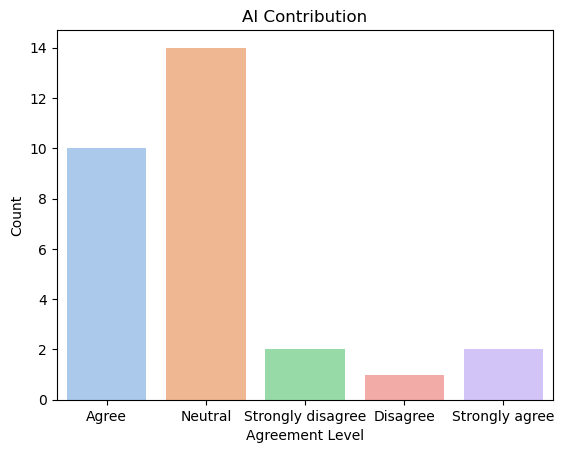

In [17]:
sns.set_palette('pastel')
sns.countplot(x='AI_Contribution', 
              data=data
             )
plt.title('AI Contribution')
plt.xlabel('Agreement Level')
plt.ylabel('Count')
plt.show()

fl.fig_caption('AI Contribution',
               'To what extent do you agree with the assertion that AI technologies can significantly contribute to the academic and professional development of 2nd-year multimedia students like yourself?')

The bar graph displayed the distribution regarding AI contribution. It analyzes the distribution of viewpoints of the participants within the five categories: Neutral, Agree, Strongly disagree, Strongly agree, and Disagree. The highest count is the neutral category followed by agree and has the lowest count of disagree. This implies that most of the participants have a balanced stance regarding the AI contribution, but also many of the participants think the AI technologies can contribute to academic and professional development.

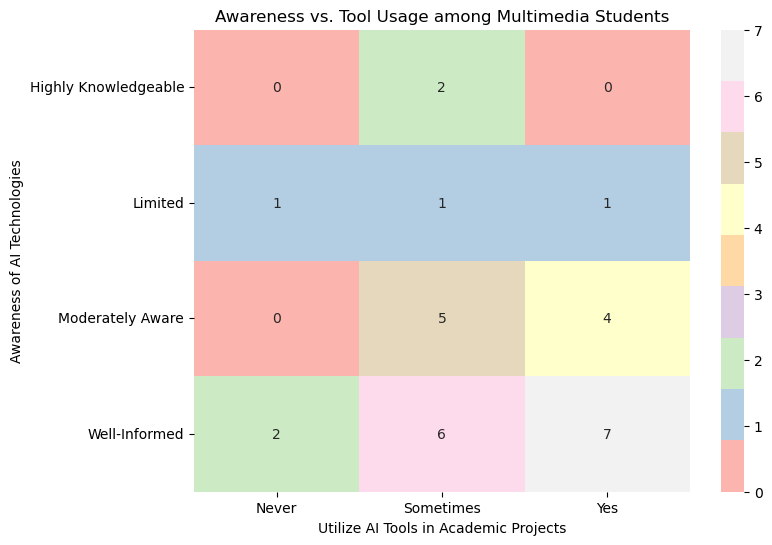

In [18]:
pastel_palette = sns.color_palette("pastel")

table = pd.crosstab(
    data['AI_Awareness'],
    data['Use_of_AI']
)

plt.figure(figsize=(8, 6))
sns.heatmap(table, annot=True, cmap='Pastel1', fmt='g')
plt.xlabel('Utilize AI Tools in Academic Projects')
plt.ylabel('Awareness of AI Technologies')
plt.title('Awareness vs. Tool Usage among Multimedia Students')
plt.xticks()
plt.yticks(rotation=0, ha="right")
plt.show()

fl.fig_caption('Awareness vs. Tool Usage',
               'AI awareness and utilization of AI tools of Multimedia students at Mapua University.')

The cross-tabulation visuals shows correalation between the questions "To what extent do you acknowledge your awareness of AI technologies relevant to your field of study?" and "Do you currently utilize any AI tools in your academic projects?". Students who were highly knowledgeable and well-informed about AI technologies were more likely to report using them in their coursework. However,some students with moderate awareness also reported using AI tools. This suggests that even a basic understanding of AI can be beneficial for incorporating these technologies into academic projects. Overall, it highlights the growing importance of AI in the field of multimedia. As AI technologies continue to develop, it is likely that students will need to be increasingly aware of and comfortable using these tools to be successful in their academic pursuits.

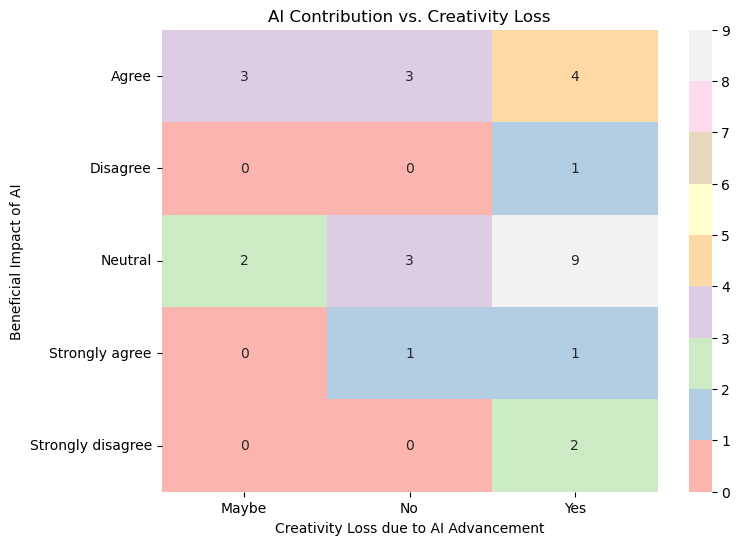

In [19]:
table = pd.crosstab(
    data['AI_Contribution'],
    data['AI_Creativity_Concern']
)

plt.figure(figsize=(8, 6))
sns.heatmap(table, annot=True, cmap='Pastel1', fmt='g')
plt.xlabel('Creativity Loss due to AI Advancement')
plt.ylabel('Beneficial Impact of AI')
plt.title('AI Contribution vs. Creativity Loss')
plt.xticks()
plt.yticks(rotation=0, ha="right")
plt.show()

fl.fig_caption('AI Contribution and Creativity Loss',
               'AI Contribution and creativity loss of Multimedia Students at Mapua University.')

This cross-tabulation for the questions "To what extent do you agree with the assertion that AI technologies can significantly contribute to the academic and professional development of 2nd-year multimedia students like yourself?" and "Do you worry that AI-generated systems may lead to a loss of creativity in artistic, traditional expression within multimedia?" show a notable portion acknowledges the potential for AI to significantly contribute to their academic and professional development, a majority express reservations or outright disagreement with this notion. This discrepancy might stem from varying levels of awareness or comprehension regarding AI's application in multimedia creation. Moreover, there's a prevalent concern among students regarding AI's impact on creativity, with a substantial number expressing agreement or strong agreement that AI-generated systems could lead to a loss of creative expression. This sentiment is underscored by the absence of students disagreeing with this notion. Additionally, a notable proportion of respondents opting for a "Maybe" response suggests a prevailing uncertainty surrounding the potential ramifications of AI on creativity within multimedia contexts.


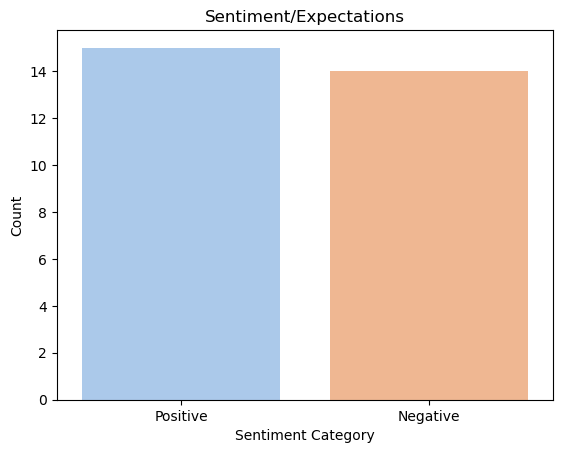

In [20]:
data['Sentiment'] = data['AI_Concerns_Expectations'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data['Sentiment_Category'] = data['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

sns.set_palette('pastel')
sns.countplot(x='Sentiment_Category', data=data)
plt.title('Sentiment/Expectations')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

fl.fig_caption('Sentiment and Expectations',
               'What are your biggest concerns or expectations regarding AI in your future studies and career as a multimedia professional?')

The sentiment analysis shows a more positive outlook on artificial intelligence (AI) on their studies and careers. The positive sentiments likely stem from the recognition of AI's capacity to streamline processes, enhance creativity, and offer innovative solutions within multimedia disciplines. Professionals may anticipate AI's role in automating repetitive tasks, enabling them to focus on more strategic and creative endeavors. Moreover, AI's ability to analyze vast amounts of data could facilitate deeper insights and more personalized experiences for audiences. However, amidst these optimistic expectations, concerns linger regarding AI's potential to disrupt traditional workflows, displace certain job roles, or perpetuate biases if not developed and deployed ethically. Therefore, while optimism prevails, it's crucial for multimedia professionals to navigate the integration of AI with a balanced awareness of both its promises and pitfalls.

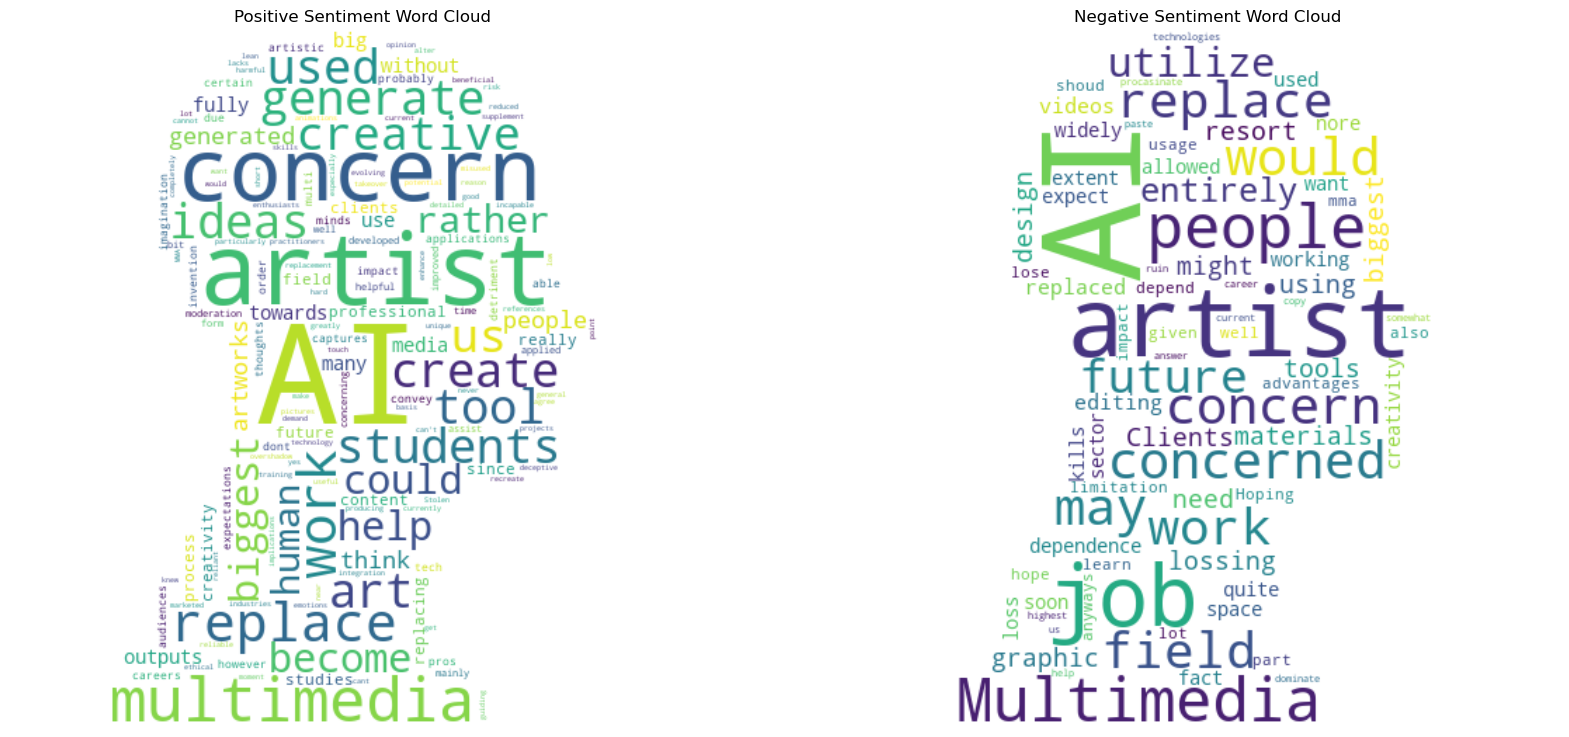

In [21]:
positive_text = ' '.join(data[data['Sentiment_Category'] == 'Positive']['AI_Concerns_Expectations'])
negative_text = ' '.join(data[data['Sentiment_Category'] == 'Negative']['AI_Concerns_Expectations'])

# Generate word cloud for positive sentiment
positive_wordcloud = WordCloud(width=800, 
                               height=400, 
                               background_color='white', 
                               stopwords=stopwords.words('english'), 
                               mask=np.array(Image.open('human_head.png'))).generate(positive_text)

# Generate word cloud for negative sentiment
negative_wordcloud = WordCloud(width=800, 
                               height=400, 
                               background_color='white', 
                               stopwords=stopwords.words('english'), 
                               mask=np.array(Image.open('human_head.png'))).generate(negative_text)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, 
           interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, 
           interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()

The cloud reveals a mix of positive and negative sentiment surrounding AI. Words like "generate," "opportunities," and "biggest"  highlight a sense of anticipation about the potential of AI in the field. Additionally, it suggests that AI is seen as a significant factor in the future of multimedia studies and careers and  indicates a positive outlook on the possibilities that AI presents in the field. However, concerns are evident with words like "job", "lose," "replace," "concerned," and "limited" appearing prominently.It suggest a major concern about the potential for job displacement or loss of creative control due to AI which reinforces the concern about AI replacing human roles in multimedia professions and indicates some anxiety about the impact of AI on the future of multimedia professions.

In [22]:
data['AI_Concerns_Expectations'] = data['AI_Concerns_Expectations'].fillna("")

responses = data['AI_Concerns_Expectations']

clean_responses = responses.str.lower().str.replace("[^\w\s]", "", regex=True)

codes = {
    "job_displacement": ["loss of job", "replaced", "unemployment", "low clients"],
    "ethical_concerns": {
        "bias": ["bias", "discrimination"],
        "privacy": ["privacy", "control"],
    },
    "misuse_of_ai": {
        "weaponization": ["weaponization", "harmful content", "dominate","ruin"],
        "hacking": ["hacking", "stolen"],
        "safety": ["safety","detriment"],
    },
    "societal_impact": {
        "inequality": ["inequality", "kills creativity","alter the process"],
        "social_unrest": ["social unrest"],
        "dependence": ["dependence", "over dependence", "more reliant"],
        "human_values": ["human values"],
    },
    "other": ["beneficial", "enhanced", "N/A", "useful","helpful"],
}

coded_responses = []
for response in clean_responses:
    for theme, sub_themes in codes.items():
        if isinstance(sub_themes, list):
            if any(keyword in response for keyword in sub_themes):
                coded_responses.append(theme)
                break
        else:
            for sub_theme, keywords in sub_themes.items():
                if any(keyword in response for keyword in keywords):
                    coded_responses.append(theme)
                    break

desired_order = ["job_displacement", "ethical_concerns", 
                 "misuse_of_ai", "societal_impact", "other"]

theme_counts = Counter(coded_responses)

print("Theme frequencies:")
for theme in desired_order:
    count = theme_counts[theme]
    if count >= 0:
        print(f"- {theme}: {count}")

Theme frequencies:
- job_displacement: 3
- ethical_concerns: 0
- misuse_of_ai: 4
- societal_impact: 3
- other: 3


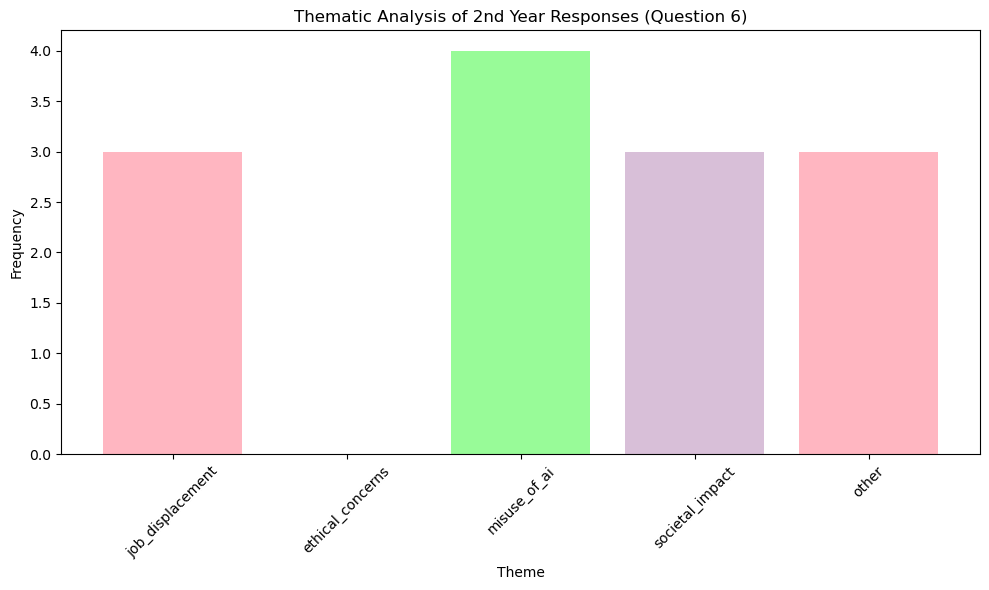

In [23]:
import matplotlib.pyplot as plt
import numpy as np

pastel_colors = ["#FFB6C1", "#87CEFA", "#98FB98", "#D8BFD8"]
theme_names = desired_order
theme_frequencies = [theme_counts[theme] for theme in desired_order]

plt.figure(figsize=(10, 6))
plt.bar(theme_names, theme_frequencies, color=pastel_colors)
plt.xlabel("Theme")
plt.ylabel("Frequency")
plt.title("Thematic Analysis of 2nd Year Responses (Question 6)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fl.fig_caption('Multimedia Students Responses on Question 6',
               'Thematic Analysis of the responses on Question 6 by 2nd Year Multimedia Students at Mapua University.')

The thematic analysis highlights the anxieties and uncertainties surrounding the future of AI in multimedia professions. In the visualization, it is evident that the theme categorization of AI misuse is significantly high among the other themes. This indicates that the multimedia students are more inclined to the probability that with the utilization of AI, it will engage in a consequential movement in creating harm and misuse in the multimedia setting than being replaced by AI in their field of work.

[ref]: #top
[Back to Table of Contents][ref]

<a name="res_dis"></a>
## Results and Discussions

In this section, results of all the graphs will be provided, along with a brief discussion.
***

**Gender Distribution:** The pie chart depicting the gender distribution of survey participants reveals a higher representation of females compared to males. Specifically, 56.2% of the survey participants are female, while 44.6% are male. This suggests that females constitute a slight majority in the sample population, with a difference of about 11.6 percentage points between the two groups. Such a distribution may reflect broader trends within the context of the study or the specific demographic being surveyed.

**AI Awareness:** The bar graph depicting AI awareness among survey participants reveals a concentration of responses within the "well-informed" category, which accounts for 15 counts, the highest among the levels shown. Other levels such as "limited" and "highly knowledgeable" are significantly lower, with counts of 3 and 2 respectively, while the "very limited" category has no representation. This pattern indicates that the majority of participants possess a moderate to solid understanding of AI concepts and technologies, suggesting that they are aware of AI's presence and implications but may not be experts. The low representation in the "highly knowledgeable" and "limited" categories implies a focus area for educational efforts: to elevate the understanding of those with limited awareness and support the journey from well-informed to highly knowledgeable. The overall distribution emphasizes the need for targeted education and training to enhance AI literacy among the participants.

**Use of AI:** The bar graph illustrating the use of AI among participants indicates that the majority have some experience with AI technology in their academic projects. With the x-axis representing different frequencies of AI use—"yes," "sometimes," "never," and "not familiar"—and the y-axis indicating counts from 0 to 14, the data shows that the highest count, 14, falls within the "sometimes" category. The "yes" category follows closely with 12 counts, suggesting a significant proportion of participants use AI regularly or sporadically. The "never" category has only 3 counts, indicating a small minority who do not engage with AI, while "not familiar" has no representation, reflecting that all participants are at least somewhat aware of AI's existence. This pattern suggests a high degree of interest and engagement with AI tools among participants, with most utilizing them to some extent in their academic work. The dominance of the "sometimes" and "yes" categories indicates that AI is becoming an integral part of students' workflows, reinforcing the importance of understanding AI's role in multimedia education. The low count for "never" and the absence of "not familiar" indicate that AI's presence is pervasive, with almost all participants incorporating it into their academic projects in some capacity.

**AI Job Concern:** The bar graph representing job concerns related to AI advancements reflects a range of apprehensions among participants regarding potential job replacement. "Very" is the second-highest category, with 7 counts, indicating that a significant portion of participants has a heightened level of fear regarding job security due to AI. "Extremely" follows with 5 counts, showing that some respondents are deeply concerned. On the lower end, "slightly" has 4 counts, indicating a minor level of worry, and "not at all" has just 1 count, suggesting minimal fear of job replacement by AI. The data suggests that while most participants express some level of concern about AI's impact on their future employment, the degree of concern varies, with the majority falling in the moderate to very concerned range. This range of responses indicates that while AI-induced job displacement is a concern, there's a diverse set of perceptions about its impact, from moderate worry to extreme apprehension, with a small fraction exhibiting little to no concern.

**AI Creativity Concern:** The bar graph illustrating AI creativity concerns captures respondents' varying levels of apprehension about the impact of AI on creativity. With 17 respondents indicating "yes," a significant majority express concern that AI could lead to a loss of creativity. This predominant result suggests that many respondents are wary about AI's potential to reduce the human creative element in multimedia work. The "maybe" category has 5 counts, indicating some uncertainty among a smaller group of respondents. The "no" category, with 7 counts, reflects those who do not share this concern, suggesting they believe AI does not threaten creativity. The overall pattern indicates a strong inclination toward concern about AI's influence on creativity, with a considerable segment of respondents expressing fear of losing originality and uniqueness when applying AI tools. This analysis sheds light on the apprehensions surrounding AI's role in creativity and underscores the need for balancing AI technology with human creativity in multimedia education and industries.

**AI Contribution:** The bar graph representing AI's contribution to the academic and professional development of second-year multimedia students indicates a range of perspectives on this topic. The results reveal that the "neutral" category has the highest count with 14 participants, suggesting that many respondents hold a balanced or undecided stance on AI's role in their academic and professional growth. The "agree" category, with 10 counts, follows closely, indicating that a significant portion of respondents sees AI as beneficial. The "strongly disagree" and "disagree" categories, with 2 and 1 counts respectively, represent those who do not see AI technologies as significantly contributing to their development. Meanwhile, the "strongly agree" category, with 2 counts, reflects a small but definitive group that strongly believes in AI's positive impact.

The overall distribution indicates a significant degree of neutrality, with many respondents remaining cautious or uncertain about AI's role in academic and professional advancement. The strong representation in the "agree" category shows that a substantial number of participants recognize AI's potential benefits, suggesting an optimistic view toward AI's contribution to multimedia education. The relatively low counts in the "strongly agree," "disagree," and "strongly disagree" categories highlight that most participants maintain a moderate position, either positive or neutral, rather than extreme views. This insight underscores the importance of providing additional information and education to help students better understand AI's implications and how it might enhance their academic and professional pursuits.

**Awareness vs Tool Usage:** The cross-tabulation visuals that examine the correlation between AI awareness and AI tool usage in academic projects reveal a significant relationship between a student's knowledge of AI and their likelihood of utilizing AI tools. The analysis shows that students with a higher level of awareness—those categorized as "highly knowledgeable" or "well-informed"—are more likely to use AI technologies in their coursework, suggesting a direct correlation between understanding AI concepts and applying them in practice. Additionally, some students with a "moderate" level of awareness also reported using AI tools, indicating that even a foundational understanding of AI can facilitate the integration of these technologies into academic projects.

This pattern suggests that increased awareness and education about AI can encourage students to leverage AI tools for academic purposes. The findings underline the importance of promoting AI literacy within multimedia education to prepare students for the evolving technological landscape. As AI continues to advance and permeate various industries, students will likely need to develop their AI skills to remain competitive and successful. This cross-tabulation visualization emphasizes the growing role of AI in multimedia and the potential benefits of ensuring students are both aware of and adept at using AI tools in their studies and future careers.

**AI Contribution and Creativity Loss:** The cross-tabulation of questions on AI's contribution to academic and professional development and AI's potential to affect creativity reveals mixed sentiments among second-year multimedia students. While some students agree that AI can positively impact their academic and professional growth, the majority express skepticism or outright disagreement with this notion. This skepticism may reflect different levels of understanding or comfort with AI technologies in multimedia. Notably, a significant number of students are concerned that AI-generated systems could lead to a loss of creativity, with a high level of agreement or strong agreement on this point and no respondents disagreeing with it. Additionally, the presence of many "Maybe" responses suggests an underlying uncertainty about AI's role in creativity. These findings indicate that students are ambivalent about AI's broader impact, seeing its potential benefits but also fearing its consequences for traditional artistic expression, highlighting the importance of addressing both technological advancement and creative integrity in multimedia education.

**Sentiment and Expectations:** The bar graph reflecting sentiment and expectations toward artificial intelligence (AI) reveals a slight majority with positive sentiment, as indicated by 15 respondents expressing a favorable view compared to 12 with a negative outlook. This sentiment analysis suggests that most participants recognize the benefits AI could bring to their studies and careers in multimedia. Positive sentiments might arise from AI's potential to streamline processes, enhance creativity, and offer innovative solutions within the field. Multimedia professionals could foresee AI automating repetitive tasks, allowing them to focus on more strategic and creative activities. Additionally, AI's capacity to analyze large volumes of data could lead to deeper insights and more personalized audience experiences.

However, the notable count of negative sentiments underscores existing concerns about AI's potential impact on traditional workflows, job displacement, and ethical issues such as perpetuating biases. These concerns suggest that while many respondents see the value of AI, they also remain cautious about its possible disruptive effects on existing practices and the workforce.

The bar graph's balance between positive and negative sentiments highlights the importance of a nuanced approach to AI integration in multimedia. Professionals and educators should encourage the adoption of AI while addressing the concerns that could arise, ensuring ethical development and deployment to maintain traditional creativity and job security. This balanced perspective is critical as AI technologies continue to evolve and influence multimedia disciplines.

**Wordcloud:** The word cloud presents a visual summary of the sentiments surrounding AI in the multimedia field, showcasing a blend of positive and negative themes. Terms like "generate," "opportunities," and "biggest" reflect optimism about AI's potential to revolutionize the industry by creating new opportunities and driving innovation. These words suggest that many see AI as a key player in the future of multimedia studies and careers. However, the cloud also contains words like "job," "lose," "replace," "concerned," and "limited," indicating a significant concern about AI's impact on employment and creative control. This mix of terms highlights an ambivalent outlook, with excitement for AI's capabilities alongside apprehension about its potential to displace human roles and diminish creativity. The word cloud underscores the need for a balanced approach to AI integration, encouraging its benefits while addressing its risks to ensure a sustainable future for multimedia professions.

**Multimedia Students Responses on Question 6:** The bar graph illustrating the thematic analysis of responses from second-year Multimedia students at Mapua University regarding Question 6 sheds light on their primary concerns about AI's impact on multimedia professions. The graph shows that "misuse of AI" is the most prominent concern, with 4 counts, indicating that students fear AI's potential to be used inappropriately or unethically within the multimedia context. This might involve AI's role in spreading misinformation, infringing on intellectual property, or creating harmful content. Other themes like "job displacement," "societal impact," and "other" each have 3 counts, suggesting that students are also worried about AI replacing jobs, causing broader societal issues, or other unspecified risks. The "ethical concerns" theme, which has no counts, indicates that while misuse of AI is a worry, it's not necessarily viewed through an explicitly ethical lens. This analysis points to the importance of addressing misuse risks and providing clear guidelines and ethical frameworks for AI in multimedia to mitigate concerns and ensure responsible integration.



[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
This section will provide a conclusion and suggestions drawn from the results and discussion.
***

The opinions and experiences of second-year multimedia students of Mapua University are useful in this study that explores the relationship between artificial intelligence (AI) and multimedia. It reveals a predominantly positive outlook, yet it is nuanced by apprehensions regarding potential misuse and ethical implications. While the study's limited sample size precludes broad extrapolation, it offers valuable insights for targeted actions. Proactive measures are imperative to address AI literacy, ethical awareness, and practical integration within multimedia education. To address these insights, Mapua University and similar institutions should prioritize enhancing AI literacy and ethical awareness among multimedia students. This entails developing AI-focused curriculum modules, hosting workshops and seminars, and fostering interdisciplinary collaborations to evaluate AI applications ethically. Moreover, providing hands-on experiences through internships and partnerships can empower students to navigate AI-integrated industries responsibly and effectively.

[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
## References
***

*Kamalov, F., Santandreu Calonge, D., & Gurrib, I. (2023). New era of artificial intelligence in education: towards a sustainable multifaceted revolution. Sustainability, 15(16), 12451.*

*Nakod, R. R. (2022, December 7). Multimedia intelligence: Confluence of multimedia and artificial intelligence. Embedded Computing. https://embeddedcomputing.com/technology/ai-machine-learning/multimedia-intelligence-confluence-of-multimedia-and-artificial-intelligence*

*Zhu, W., Wang, X., & Gao, W. (2020). Multimedia Intelligence: When Multimedia Meets Artificial Intelligence. IEEE Transactions on Multimedia, 1–1. doi:10.1109/tmm.2020.2969791*

[ref]: #top
[Back to Table of Contents][ref]

***
***